In [1]:
import sys
sys.path.append('/home/ivan/distribution_connector')
import os

from sklearn.decomposition import TruncatedSVD


In [2]:
from sklearn import datasets
import numpy as np
import torch
from tqdm import tqdm
from connector_utils import test_models, gather_statistics, test_func
import matplotlib.pyplot as plt

In [3]:
from connector import Connector
# from one_layer_utils import samples, make_dataset, get_model, get_b
from utils import test_model
from tqdm import tqdm

In [4]:
import models
architecture = getattr(models, "Linear3NoBias") #LinearOneLayer LogRegression

import data
loaders, num_classes = data.loaders(
    "CIFAR10",
    "data",
    1024,
    1,
    "VGG",
    True,
    train_random=False,
    shuffle_train=False)

model1 = architecture.base(num_classes=10, **architecture.kwargs)
model2 = architecture.base(num_classes=10, **architecture.kwargs)

model1.load_state_dict(torch.load('curves/Linear3NoBias/curve3/checkpoint-400.pt')['model_state'])
model2.load_state_dict(torch.load('curves/Linear3NoBias/curve4/checkpoint-400.pt')['model_state'])


Files already downloaded and verified
You are going to run models on the test set. Are you sure?
Files already downloaded and verified


IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [5]:
# np.array(stat['train']).std(), np.array(stat['test']).std()

In [6]:
# model1.cuda();
# model1.eval();
# test_model(model1, loaders, cuda=True)

In [7]:
# model2.cuda();
# model2.eval();
# test_model(model2, loaders, cuda=True)

In [8]:
def get_data(data_type='train'):

    layer = 0
    model1.cuda()
    model1.eval()
    functions = []
    targ = []
    data = []
    for X, y in loaders[data_type]:
        data.append(X.view(-1,3*32*32).cpu().data.numpy())
        functions.append(model1(X.cuda(), N=layer))
        targ.append(y)


    print('l', functions[0].shape)
    data = np.concatenate(data)
    targ = np.concatenate(targ)
    funcs = np.concatenate([p.cpu().data.numpy() for p in functions])
    
    return data, targ, funcs

In [9]:
data, targ, _ = get_data(data_type='train')

l torch.Size([1024, 6144])


In [10]:
data.shape, targ.shape

((50000, 3072), (50000,))

In [11]:
data_test, targ_test, _ = get_data(data_type='test')

l torch.Size([1024, 6144])


In [40]:
data, targ = data_test[:6144], targ_test[:6144]

In [41]:
# W10 = list(model1.parameters())[0].data.cpu().numpy()
# W20 = list(model2.parameters())[0].data.cpu().numpy()

# W11 = list(model1.parameters())[-2].data.cpu().numpy()
# W21 = list(model2.parameters())[-2].data.cpu().numpy()

# W12 = list(model1.parameters())[-1].data.cpu().numpy()
# W22 = list(model2.parameters())[-1].data.cpu().numpy()

In [42]:
def next_layer(W, data):
    funcs = np.maximum(data @ W.T, 0)
    return funcs

    
def accuracy(pred, targ):
    ens_acc = 100.0 * np.mean(np.argmax(pred, axis=1) == targ)
    return ens_acc

In [44]:
# model1.cuda()
# model2.cuda()
# acc_train = []
# acc_test = []
# t = 0.5
# stat = {'train': [], 'test': []}
# for i in tqdm(range(3, 10)):
#     model1.load_state_dict(torch.load('curves/Linear3NoBias/curve'+str(i)+'/checkpoint-400.pt')['model_state'])
#     model2.load_state_dict(torch.load('curves/Linear3NoBias/curve'+str(i+1)+'/checkpoint-400.pt')['model_state'])

#     W10 = list(model1.parameters())[0].data.cpu().numpy()
#     W20 = list(model2.parameters())[0].data.cpu().numpy()

#     W11 = list(model1.parameters())[-2].data.cpu().numpy()
#     W21 = list(model2.parameters())[-2].data.cpu().numpy()

#     W12 = list(model1.parameters())[-1].data.cpu().numpy()
#     W22 = list(model2.parameters())[-1].data.cpu().numpy()
    
# #     W2n = Connector(W12.T, W22.T).arc_connect(t=t)[1].T
# #     W1n = Connector(W11.T, W21.T).arc_connect(t=t)[1].T
# #     W0n = Connector(W10.T, W20.T).arc_connect(t=t)[1].T
    
#     W2n = Connector(W12, W22).lin_connect(t=t)[1]
#     W1n = Connector(W11, W21).lin_connect(t=t)[1]
#     W0n = Connector(W10, W20).lin_connect(t=t)[1]
    
# #     W2n = Connector(W12, W22).arc_connect(t=t)[1]
# #     W1n = Connector(W11.T, W21.T).arc_connect(t=t)[1].T
# #     W0n = Connector(W10, W20).arc_connect(t=t)[1]
    
#     pred = W2n @ np.maximum(W1n @ np.maximum(W0n @ data.T, 0), 0)
#     acc = accuracy(pred.T, targ)
#     acc_train.append(acc)
    
#     pred = W2n @ np.maximum(W1n @ np.maximum(W0n @ data_test.T, 0), 0)
#     acc = accuracy(pred.T, targ_test)
#     acc_test.append(acc)
    
# acc_train = np.array(acc_train)
# acc_test = np.array(acc_test)


In [45]:
acc_train

[]

In [40]:
acc_test

array([25.47, 27.71, 28.94, 27.67, 28.01, 26.21, 26.38])

In [41]:
acc_train.mean(), acc_train.std(), acc_test.mean(), acc_test.std()

(31.106571428571424, 0.8446339625022451, 27.19857142857143, 1.1218661566645942)

In [30]:
acc_train.mean(), acc_train.std(), acc_test.mean(), acc_test.std()

(46.398, 1.0352705650491292, 40.17285714285714, 0.8496674019153343)

In [28]:
acc_train.mean(), acc_train.std(), acc_test.mean(), acc_test.std()

(44.5, 0.6738511917118114, 37.55142857142857, 0.7603651110097153)

In [16]:
# data = data[:2000]
# targ = targ[:2000]

In [17]:
# pred = W12 @ np.maximum(W11 @ np.maximum(W10 @ data.T, 0), 0)
# pred_test = W12 @ np.maximum(W11 @ np.maximum(W10 @ data_test.T, 0), 0)
# print(accuracy(pred.T, targ), accuracy(pred_test.T, targ_test))

In [18]:
# pred = W22 @ np.maximum(W21 @ np.maximum(W20 @ data.T, 0), 0)
# pred_test = W22 @ np.maximum(W21 @ np.maximum(W20 @ data_test.T, 0), 0)
# print(accuracy(pred.T, targ), accuracy(pred_test.T, targ_test))

In [19]:
# funcs1 = next_layer(W10, data=data)
# funcs2  = next_layer(W20, data=data)

In [20]:
# f_inv2 = np.linalg.pinv(funcs2.T)
# W11b2 = W11 @ funcs1.T @ f_inv2

In [21]:
# pred = W12 @ np.maximum(W11b2 @ np.maximum(W20 @ data.T, 0), 0)
# pred_test = W12 @ np.maximum(W11b2 @ np.maximum(W20 @ data_test.T, 0), 0)
# print(accuracy(pred.T, targ), accuracy(pred_test.T, targ_test))

In [22]:
# funcs12 = next_layer(W11, data=funcs1)
# funcs22  = next_layer(W21, data=funcs2)

In [23]:
# f_inv22 = np.linalg.pinv(funcs22.T)
# W12b2 = W12 @ funcs12.T @ f_inv22

In [24]:
# pred = W12 @ np.maximum(W11b2 @ np.maximum(W20 @ data.T, 0), 0)
# pred_test = W12b2 @ np.maximum(W21 @ np.maximum(W20 @ data_test.T, 0), 0)
# print(accuracy(pred.T, targ), accuracy(pred_test.T, targ_test))

In [25]:
# print(W10.shape, W11.shape, W12.shape)

In [46]:
class PointFinder():
    def __init__(self, model1, model2):
        out = {}
        self.W10 = list(model1.parameters())[0].data.cpu().numpy()
        self.W20 = list(model2.parameters())[0].data.cpu().numpy()

        self.W11 = list(model1.parameters())[-2].data.cpu().numpy()
        self.W21 = list(model2.parameters())[-2].data.cpu().numpy()

        self.W12 = list(model1.parameters())[-1].data.cpu().numpy()
        self.W22 = list(model2.parameters())[-1].data.cpu().numpy()

        self.funcs1 = next_layer(self.W10, data=data)
        self.funcs2  = next_layer(self.W20, data=data)
        self.f_inv2 = np.linalg.pinv(self.funcs2.T)
        self.W11b2 = self.W11 @ self.funcs1.T @ self.f_inv2

    def find_point(self, t=0.5, method='arc_connect'):

        out = {}
        if 0<=t<1:
            s = t
            # go from model1 basic to model2 basis weight in 2th layer
            Wn0 = getattr(Connector(self.W10, self.W20), method)(t=s)[1]
            Wn1 = getattr(Connector(self.W11.T, self.W11b2.T), method)(t=s)[1].T
            
            pred = self.W12 @ np.maximum( Wn1 @ np.maximum(Wn0 @ data.T, 0), 0)
            out['train'] = accuracy(pred.T, targ)

            pred_test = self.W12 @ np.maximum( Wn1 @ np.maximum(Wn0 @ data_test.T, 0), 0)
            out['test'] = accuracy(pred_test.T, targ_test)
        elif 1<=t<=2:
            s = t - 1
            # go from model1 basic to model2 basis weight in 3th layer
            Wn1 = getattr(Connector(self.W11b2, self.W21), method)(t=s)[1]
            Wn2 = getattr(Connector(self.W12.T, self.W22.T), method)(t=s)[1].T
            
            pred = Wn2 @ np.maximum( Wn1 @ np.maximum(self.W20 @ data.T, 0), 0)
            out['train'] = accuracy(pred.T, targ)

            pred_test = Wn2 @ np.maximum( Wn1 @ np.maximum(self.W20 @ data_test.T, 0), 0)
            out['test'] = accuracy(pred_test.T, targ_test)
  
        else:
            assert not  0<=t<=2, 't is not in [0, 2]'

        return out

In [47]:
len(data), len(data_test)

(6144, 10000)

In [48]:
class PointFinderInverse():
    def __init__(self, model1, model2):
        out = {}
        self.W10 = list(model1.parameters())[0].data.cpu().numpy()
        self.W20 = list(model2.parameters())[0].data.cpu().numpy()

        self.W11 = list(model1.parameters())[-2].data.cpu().numpy()
        self.W21 = list(model2.parameters())[-2].data.cpu().numpy()

        self.W12 = list(model1.parameters())[-1].data.cpu().numpy()
        self.W22 = list(model2.parameters())[-1].data.cpu().numpy()

        self.funcs11 = next_layer(self.W10, data=data)
        self.funcs12 = next_layer(self.W11, data=self.funcs11)
        
        self.funcs21 = next_layer(self.W20, data=data)
        self.funcs22 = next_layer(self.W21, data=self.funcs21)
        
        self.f_inv21 = np.linalg.pinv(self.funcs21.T)
        self.W11b2 = self.W11 @ self.funcs11.T @ self.f_inv21
        
        self.f_inv22 = np.linalg.pinv(self.funcs22.T)
        self.W12b2 = self.W12 @ self.funcs12.T @ self.f_inv22
        
    def find_point(self, t=0.5, method='arc_connect'):

        out = {}
        if 0<=t<=1:
            s = t
            # go from model1 basic to model2 basis weight in 2th layer
            
            Wn0 = getattr(Connector(self.W10, self.W20), method)(t=s)[1]
            
            funcs = next_layer(Wn0, data=data)
            f_inv = np.linalg.pinv(funcs.T)
            Wn1 = self.W11 @ self.funcs11.T @ f_inv
            
            pred = self.W12 @ np.maximum( Wn1 @ np.maximum(Wn0 @ data.T, 0), 0)
            out['train'] = accuracy(pred.T, targ)

            pred_test = self.W12 @ np.maximum( Wn1 @ np.maximum(Wn0 @ data_test.T, 0), 0)
            out['test'] = accuracy(pred_test.T, targ_test)

        elif 1<t<=2:
            s = t - 1
            # go from model1 basic to model2 basis weight in 3th layer
            Wn1 = getattr(Connector(self.W11b2, self.W21), method)(t=s)[1]

            funcs = next_layer(Wn1, data=self.funcs21)
            f_inv = np.linalg.pinv(funcs.T)
            Wn2 = self.W12 @ self.funcs12.T @ f_inv

            pred = Wn2 @ np.maximum( Wn1 @ np.maximum(self.W20 @ data.T, 0), 0)
            out['train'] = accuracy(pred.T, targ)

            pred_test = Wn2 @ np.maximum( Wn1 @ np.maximum(self.W20 @ data_test.T, 0), 0)
            out['test'] = accuracy(pred_test.T, targ_test)
            
        elif 2<t<=3:
            s = t - 2
            Wn1 = getattr(Connector(self.W12b2, self.W22), method)(t=s)[1]
               
            pred = Wn1 @ np.maximum( self.W21 @ np.maximum(self.W20 @ data.T, 0), 0)
            out['train'] = accuracy(pred.T, targ)

            pred_test = Wn1 @ np.maximum( self.W21 @ np.maximum(self.W20 @ data_test.T, 0), 0)
            out['test'] = accuracy(pred_test.T, targ_test)
            
        else:
            assert not  0<=t<=3, 't is not in [0, 3]'
            
        print(t, out)

        return out

# Path Visualization 

In [49]:
finder = PointFinderInverse(model1, model2) 
# finder = PointFinder(model1, model2)

In [50]:
point = finder.find_point(t=1)

1 {'train': 62.679036458333336, 'test': 43.04}


In [51]:
point = finder.find_point(t=2)

2 {'train': 62.79296875, 'test': 61.0}


In [23]:
point = finder.find_point(t=0, method='arc_connect')

0 {'train': 70.0, 'test': 16.1}


In [28]:
point = finder.find_point(t=0.5)

0.5 {'train': 70.0, 'test': 15.870000000000001}


In [29]:
point = finder.find_point(t=1.5)

1.5 {'train': 70.0, 'test': 22.89}


In [30]:
point = finder.find_point(t=2.5)

2.5 {'train': 70.0, 'test': 62.79}


In [26]:
point = finder.find_point(t=3)

3 {'train': 60.0, 'test': 63.44}


In [86]:
point1 = finder.find_point(t=1, method='arc_connect')
point1

1 {'train': 98.03059895833334, 'test': 10.27}


{'train': 98.03059895833334, 'test': 10.27}

In [87]:
point2 = finder.find_point(t=2, method='arc_connect')
point2

2 {'train': 98.095703125, 'test': 10.79}


{'train': 98.095703125, 'test': 10.79}

In [88]:
point3 = finder.find_point(t=2.5, method='arc_connect')
point3

2.5 {'train': 98.86067708333334, 'test': 11.600000000000001}


{'train': 98.86067708333334, 'test': 11.600000000000001}

In [130]:
time = np.linspace(0, 2, 9)

In [132]:
time = list(time) + [2.5, 3] 

In [133]:
time

[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.5, 3]

In [134]:
point

{'train': 98.095703125, 'test': 10.79}

In [135]:
path = {'test': [], 'train': []}
for t in tqdm(time):
    point = finder.find_point(t=t, method='arc_connect')
    path['test'].append(100-point['test']) 
    path['train'].append(100-point['train']) 

  9%|▉         | 1/11 [02:09<21:32, 129.25s/it]

0.0 {'train': 97.68599999999999, 'test': 64.4}


 18%|█▊        | 2/11 [04:18<19:23, 129.26s/it]

0.25 {'train': 97.404, 'test': 64.01}


 27%|██▋       | 3/11 [06:27<17:13, 129.19s/it]

0.5 {'train': 96.878, 'test': 63.839999999999996}


 36%|███▋      | 4/11 [08:36<15:04, 129.17s/it]

0.75 {'train': 96.746, 'test': 63.7}


 45%|████▌     | 5/11 [10:45<12:54, 129.13s/it]

1.0 {'train': 96.808, 'test': 63.739999999999995}


 55%|█████▍    | 6/11 [12:46<10:33, 126.71s/it]

1.25 {'train': 92.268, 'test': 62.8}


 64%|██████▎   | 7/11 [14:47<08:19, 125.00s/it]

1.5 {'train': 83.91, 'test': 61.71}


 73%|███████▎  | 8/11 [16:48<06:11, 123.83s/it]

1.75 {'train': 89.932, 'test': 63.2}


 82%|████████▏ | 9/11 [18:49<04:06, 123.00s/it]

2.0 {'train': 94.774, 'test': 64.05999999999999}


 91%|█████████ | 10/11 [19:02<01:29, 89.73s/it]

2.5 {'train': 97.234, 'test': 65.11}


100%|██████████| 11/11 [19:14<00:00, 66.44s/it]

3 {'train': 97.832, 'test': 64.66}


In [136]:
100 - np.array(path['train'])

array([97.686, 97.404, 96.878, 96.746, 96.808, 92.268, 83.91 , 89.932,
       94.774, 97.234, 97.832])

In [137]:
100 - np.array(path['test'])

array([64.4 , 64.01, 63.84, 63.7 , 63.74, 62.8 , 61.71, 63.2 , 64.06,
       65.11, 64.66])

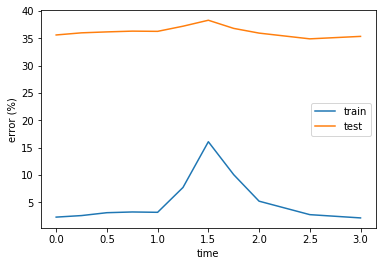

In [138]:
plt.plot(time, path['train'], label='train')
plt.plot(time, path['test'], label='test') 
plt.legend()
plt.xlabel('time')
plt.ylabel('error (%)')
plt.show()

In [36]:
path_l = {'test': [], 'train': []}
for t in tqdm(time):
    point = finder.find_point(t=t, method='lin_connect')
    path_l['test'].append(100-point['test']) 
    path_l['train'].append(100-point['train']) 

100%|██████████| 61/61 [07:43<00:00,  7.45s/it]


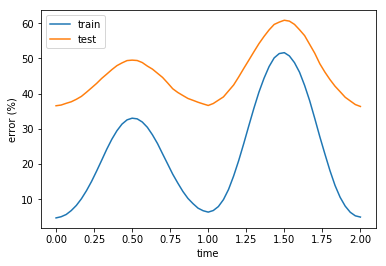

In [37]:
plt.plot(time, path_l['train'], label='train')
plt.plot(time, path_l['test'], label='test') 
plt.legend()
plt.xlabel('time')
plt.ylabel('error (%)')
plt.show()

# Count statistic in the fixed point

In [45]:
def get_stat(pointfinder, t=1.5, method='arc_connect'):
    stat = {'test': [], 'train': []}
    for i in tqdm(range(3, 9)):
        model1.load_state_dict(torch.load('curves/Linear3NoBias/curve'+str(i)+'/checkpoint-400.pt')['model_state'])
        model2.load_state_dict(torch.load('curves/Linear3NoBias/curve'+str(i+1)+'/checkpoint-400.pt')['model_state'])
        finder = pointfinder(model1, model2) 
        point = finder.find_point(t=t, method=method)
        stat['test'].append(point['test']) 
        stat['train'].append(point['train']) 
    return stat

In [46]:
arcbutterfly = get_stat(PointFinder, t=1.5, method='arc_connect')


100%|██████████| 6/6 [12:07<00:00, 121.25s/it]


In [49]:
arcbutterfly

{'test': [48.77, 50.42, 49.46, 51.32, 49.09, 48.82],
 'train': [59.931999999999995,
  60.978,
  60.397999999999996,
  62.21600000000001,
  60.01,
  60.124]}

In [52]:
def get_mean_svd(stat):
    train = np.array(stat['train'])
    test = np.array(stat['test'])
    return train.mean(), train.std(), test.mean(), test.std()

In [53]:
get_mean_svd(arcbutterfly)

(60.60966666666667, 0.7974420912448094, 49.64666666666667, 0.930477774527091)

In [54]:
linbutterfly = get_stat(PointFinder, t=1.5, method='lin_connect')


100%|██████████| 6/6 [12:06<00:00, 121.03s/it]


In [55]:
linbutterfly

{'test': [36.93, 39.17, 39.379999999999995, 39.21, 38.12, 37.75],
 'train': [46.738,
  48.374,
  48.087999999999994,
  49.036,
  47.355999999999995,
  47.326]}

In [56]:
get_mean_svd(linbutterfly)

(47.81966666666667, 0.7623922146040647, 38.42666666666667, 0.9006417465094294)

In [57]:
linpseudo = get_stat(PointFinderInverse, t=1.5, method='lin_connect')


 17%|█▋        | 1/6 [02:26<12:13, 146.64s/it]

1.5 {'train': 61.026, 'test': 51.839999999999996}



 33%|███▎      | 2/6 [04:53<09:46, 146.74s/it]

1.5 {'train': 60.948, 'test': 51.64}



 50%|█████     | 3/6 [07:20<07:20, 146.78s/it]

1.5 {'train': 60.784000000000006, 'test': 51.68000000000001}



 67%|██████▋   | 4/6 [09:47<04:53, 146.83s/it]

1.5 {'train': 61.419999999999995, 'test': 52.18000000000001}



 83%|████████▎ | 5/6 [12:14<02:26, 146.83s/it]

1.5 {'train': 60.846000000000004, 'test': 52.23}



100%|██████████| 6/6 [14:41<00:00, 146.84s/it]


1.5 {'train': 60.57599999999999, 'test': 51.68000000000001}


In [63]:
linpseudo

{'test': [51.839999999999996,
  51.64,
  51.68000000000001,
  52.18000000000001,
  52.23,
  51.68000000000001],
 'train': [61.026,
  60.948,
  60.784000000000006,
  61.419999999999995,
  60.846000000000004,
  60.57599999999999]}

In [64]:
get_mean_svd(linpseudo)

(60.93333333333334, 0.2592493437257302, 51.875, 0.2420571557848809)

In [ ]:
arcpseudo = get_stat(PointFinderInverse, t=1.5, method='arc_connect')


 17%|█▋        | 1/6 [02:26<12:14, 146.96s/it]

1.5 {'train': 71.096, 'test': 59.47}


In [65]:
arcpseudo

{'test': [59.47,
  59.38,
  58.540000000000006,
  58.95,
  58.650000000000006,
  58.699999999999996],
 'train': [71.096, 71.356, 70.706, 71.394, 71.134, 70.922]}

In [66]:
get_mean_svd(arcpseudo)

(71.10133333333334,
 0.23806628395376653,
 58.94833333333333,
 0.35960240389753795)

In [59]:
f_inv1 = np.linalg.pinv(funcs1.T)

In [60]:
f_inv2 = np.linalg.pinv(funcs2.T)

In [62]:
pred = W12 @ np.maximum(W11 @ np.maximum(W10 @ data.T, 0), 0)
accuracy(pred.T, targ)

95.27799999999999

In [70]:
pred = W12 @ np.maximum(W11 @ np.maximum(W10 @ data.T, 0), 0)
accuracy(pred.T, targ)

95.27799999999999

In [64]:
t=0.5
pred = Connector(W12.T, W22.T).arc_connect(t=t)[1].T @ np.maximum(Connector(W11, (W21 @ funcs2.T @ f_inv1)).arc_connect(t=t)[1] @  np.maximum(W10 @ data.T, 0), 0)
accuracy(pred.T, targ)

61.07

In [65]:
t = 0.5
pred = W22 @ np.maximum(Connector((W21 @ funcs2.T @ f_inv1).T, W21.T).arc_connect(t=t)[1].T @ np.maximum(Connector(W10, W20).arc_connect(t=t)[1]  @ data.T, 0), 0)
accuracy(pred.T, targ)

78.448